In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setting a figure size of all the graphs at first
plt.rcParams['figure.figsize'] = 12,8
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('Email Performance Analytics _Data_1.csv')

In [3]:
df.head()

,Midascontactid,Createdat,Emailpermissionstatus,Cont.Acq.Src,Email.Src.First,Segment,Segmentsecondary,Email.Acq.Dt,Email.Pref.Ch.Dt,Entry.Point.List,...,Eml.Click.First.Ts,Eml.Click.Last.Ts,Eml.Bounce.Last.Ts,Eml.Unsub.Last.Ts,Eml.Spam.Last.Ts,Email.Domain,Em.Pref.Status,Em.Pref.Dte,Invalid.Email.Dte,Em.Spamclplt.Dte
0,1020375449,4/23/2019,I,LIDUAS16,OOBWIN15,CON,NaN,4/22/2019,8/24/2019,|LIDUAS1608|OOBAND1407|OOBWIN1506|,...,8/21/2019,8/21/2019,NaN,NaN,NaN,gmail.com,I,8/24/2019,NaN,NaN
1,1042778096,10/16/2019,U,OOBWIN15,NaN,CON,NaN,NaN,10/15/2019,|OOBWIN1506|,...,NaN,NaN,NaN,NaN,NaN,hotmail.com,U,10/15/2019,NaN,NaN
2,1039527195,7/29/2019,I,NETMINNG,NETMINNG,CON,NaN,7/29/2019,7/30/2019,|HYBRIS1506|IGNONE20121024|SAPCRMSHIP120501|,...,NaN,NaN,NaN,NaN,NaN,hotmail.com,I,7/30/2019,NaN,NaN
3,1008356168,11/29/2019,I,EPI2,EPI2,CON,NaN,11/4/2015,11/29/2019,|HYBRIS1506|LENI2|OOBWIN1407|OOBWIN1506|RI6 PE...,...,7/28/2016,8/6/2016,NaN,11/3/2016,NaN,gmail.com,I,11/29/2019,NaN,NaN
4,1038164470,4/30/2019,U,OOBWIN15,NaN,CON,NaN,NaN,4/29/2019,|OOBWIN1506|,...,5/26/2019,5/26/2019,NaN,NaN,NaN,hotmail.com,U,4/29/2019,NaN,NaN


Important columns:

1. Midascontactid
2. Emailpermissionstatus
3. Cont.Acq.Src - TENTATIVE
4. Segment
5. Prod.Buy.Last
6. Prod.Buy.First
7. Country
8. Eml.Sent.Num (No. of emails sent)
9. Eml.Open.Num (No. of emails Opened)
10. Eml.Click.Num( No. of emails clicked)


In [4]:
df.isnull().sum()

Midascontactid                     0
Createdat                          0
Emailpermissionstatus              0
Cont.Acq.Src                      57
Email.Src.First                 3726
Segment                            0
Segmentsecondary                9913
Email.Acq.Dt                    3726
Email.Pref.Ch.Dt                  57
Entry.Point.List                  57
Cont.Acq.Src2                     57
Cont.Acq.Dte                      57
Prod.Buy.Last                   1520
Prod.Buy.First                  1520
Prod.Buy.Accessories            9962
Prod.Buy.All.In.One.Desktop     9740
Prod.Buy.Desktop                9590
Prod.Buy.Idc                    9477
Prod.Buy.Idpd                   5401
Prod.Buy.Laptop                 9914
Prod.Buy.Servers                9999
Prod.Buy.Software              10000
Prod.Buy.Thnkc                  9914
Prod.Buy.Thnkp                  9136
Prod.Buy.Warranties             9749
Prod.Buy.Workstation            9999
Prod.Buy.Android.Tablet         9998
P

In [5]:
df.drop(['Segmentsecondary', 'Prod.Buy.Accessories','Prod.Buy.All.In.One.Desktop', 
              'Prod.Buy.Desktop', 'Prod.Buy.Idc','Prod.Buy.Idpd', 'Prod.Buy.Laptop', 'Prod.Buy.Servers', 'Prod.Buy.Software', 
              'Prod.Buy.Thnkc', 'Prod.Buy.Thnkp', 'Prod.Buy.Warranties', 'Prod.Buy.Workstation', 'Prod.Buy.Android.Tablet', 
              'Prod.Buy.Windows.Tablet', 'Prod.Buy.Convertible', 'Prod.Buy.Android.Os', 'Prod.Buy.Gaming', 
              'Prod.Buy.Windows.Os', 'Prod.Buy.Gaming.Related', 'Eml.Sent.First.Ts', 'Eml.Sent.Last.Ts', 'Eml.Open.First.Ts',
              'Eml.Open.Last.Ts', 'Eml.Click.First.Ts', 'Eml.Click.Last.Ts', 'Eml.Bounce.Last.Ts','Eml.Unsub.Last.Ts', 
              'Eml.Spam.Last.Ts', 'Invalid.Email.Dte', 'Em.Spamclplt.Dte' ], axis = 1, inplace = True)

In [6]:
df.shape

(10000, 20)

In [7]:
df['Eml.Sent.Num'].fillna(0,  inplace = True)
df['Eml.Open.Num'].fillna(0,  inplace = True)
df['Eml.Click.Num'].fillna(0,  inplace = True)

In [8]:
print('Total No. of emails sent:', df['Eml.Sent.Num'].sum())
print()
print('Total No. of emails that were opened:', df['Eml.Open.Num'].sum())
print()
print('No. of users who clicked the link:', df['Eml.Click.Num'].sum())

Total No. of emails sent: 178358.0

Total No. of emails that were opened: 34767.0

No. of users who clicked the link: 4157.0


In [9]:
print('{}% of users opened emails'.format(df['Eml.Open.Num'].sum() / df['Eml.Sent.Num'].sum()*100))

19.49281781585351% of users opened emails


In [10]:
print('Out of users who opened the emails, only {}% of users clicked on links'.format(df['Eml.Click.Num'].sum() / df['Eml.Open.Num'].sum()*100))

Out of users who opened the emails, only 11.956740587338569% of users clicked on links


In [11]:
df['Country'].value_counts()

US    9447
CA     551
us       2
Name: Country, dtype: int64

In [12]:
df.groupby('Country')['Eml.Open.Num'].mean()
df.groupby('Country')['Eml.Click.Num'].mean()

Country
CA    1.063521
US    0.377898
us    0.500000
Name: Eml.Click.Num, dtype: float64

In [13]:
df['Country'] = df['Country'].replace('us','US')

As we can see US is mis-spelt in some rows we can replace the rows containing ``us`` with ``US``

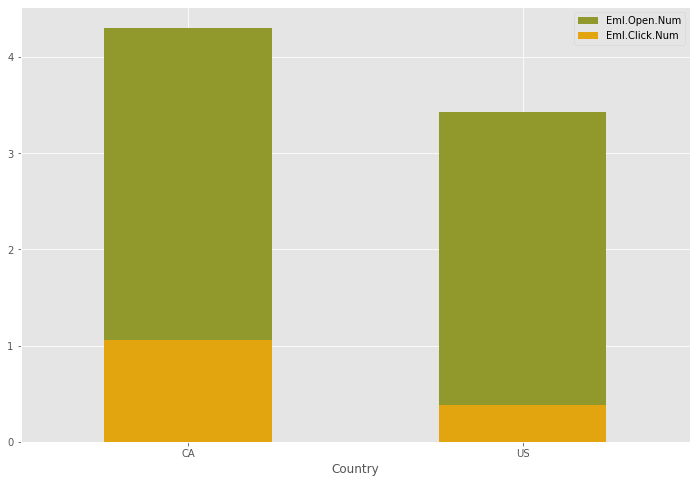

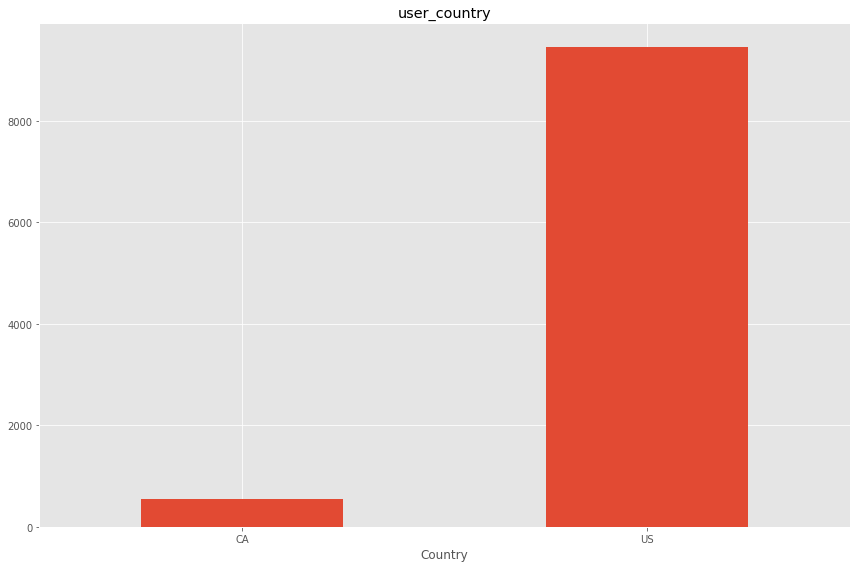

In [19]:
df.groupby('Country')['Eml.Open.Num'].mean().plot.bar(color = '#91992C')
df.groupby('Country')['Eml.Click.Num'].mean().plot.bar(color = '#E2A50F')
plt.xticks(rotation = 0)
plt.legend()
plt.show()
x = df.groupby('Country')['Midascontactid'].count()#/len(df)
x.plot.bar()
plt.title('user_country')
plt.xticks(rotation = 0)
plt.tight_layout()

In [15]:
df['Email.Domain'].value_counts()

gmail.com              4739
yahoo.com              1015
hotmail.com             834
outlook.com             825
aol.com                 238
                       ... 
desertcomputing.net       1
nittsufarm.com            1
tuofs.com                 1
acmesolution.com          1
bwdsb.on.ca               1
Name: Email.Domain, Length: 1034, dtype: int64

In [16]:
#Top 50 Users
group = df.groupby(['Midascontactid', 'Country'])['Eml.Sent.Num', 'Eml.Open.Num', 'Eml.Click.Num'].sum()
g = group.sort_values(['Eml.Sent.Num'], axis=0, ascending = False).head(50)
g.style.background_gradient(cmap = 'Purples')

,,Eml.Sent.Num,Eml.Open.Num,Eml.Click.Num
Midascontactid,Country,,,
1023965701,CA,267,104,32
223735543,US,266,14,0
1009445905,US,249,45,0
209567158,US,242,185,4
1004665391,US,241,57,7
225102151,US,232,57,18
223328960,US,232,307,11
1020375449,US,228,41,1
1000393520,US,224,99,1


In [17]:
seg = df.groupby(['Emailpermissionstatus'])['Eml.Sent.Num', 'Eml.Open.Num', 'Eml.Click.Num'].sum()
seg.sort_values(['Eml.Sent.Num'], axis=0, ascending = False).head(10)
#s.plot.bar()

,Eml.Sent.Num,Eml.Open.Num,Eml.Click.Num
Emailpermissionstatus,,,
I,133730.0,25015.0,3211.0
U,43536.0,9382.0,798.0
O,1092.0,370.0,148.0
